## **The following is my answer to the questions on Problem Set 1**

## Introduction

- The CAPM relies on two constructs: a market portfolio $M$ and beta $\beta$ which links the portfolio to the market.
- In theory $M$ contains all assets, but in practice we take it as a broad value-weighted index of traded domestic equities.

Suppose we have a portfolio $P$ with excess returns $r_{p}$ and the market portfolio $M$ with excess returns $r_{m}$. Then the beta of portfolio $P$ is equal to:

$$ \beta_{P} = \frac{\frac{1}{T}\sum_{t=1}^T (r_{P, t} - \bar{r}_P)(r_{M, t} - \bar{r}_M)}{\frac{1}{T}\sum_{t=1}^T (r_{M, t} - \bar{r}_M)^2}
= \frac{\text{Cov}(r_{P},r_{M})}{\text{Var}(r_{M})} $$

The simplest estimate of $\beta_{P}$ comes from a linear regression of portfolio excess returns $r_{P,t}$ on market excess returns $r_{M,t}$ in the same period:

$$ r_{P,t} = \alpha_{P} + \beta_{P}r_{M,t} + \epsilon_{P,t}  $$

These are realized or historical betas and alphas.

Beta is a way of separating risk and return into two parts: a market component and a residual component. The residual return $\theta_{P}$ is uncorrelated with the market return $r_{M}$ and so the variance of portfolio $P$ is:


$$ \sigma_{P}^{2} = \beta^{2}_{P}\sigma_{M}^{2} + \sigma_{\epsilon,P}^{2} $$


Where $\sigma_{\epsilon,P}^{2}$ is the residual variance of the portfolio.

The **CAPM** states that the expected residual return on all stocks and any portfolio is equal to zero, i.e. $\alpha_P=0$. Therefore the expected excess return on the portfolio $E[r_{P}]=\mu_{P}$ is determined entirely by the expected excess return on the market, $E[r_{M}]=\mu_{M}$ and the portfolio $\beta$, i.e:

$$ E[r_{P}] = \beta_{P}E[r_{M}] =  \beta_{P}\mu_{M} $$

## Loading data

We will use the S&P500 as 'the market', Microsoft's (**MSFT**) as an example stock, and the 1-month Treasury bill as the risk-free rate (we convert the rate to daily returns). First we load libraries:

First we will load data on the S&P500 (the market) for the period 2005-2019. We'll use data for the **SPY** ETF:

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 544 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
#import fix_yahoo_finance
import yfinance as yf

In [ ]:
# Set start and end date for stock prices
start_date = datetime(2005, 1, 1)
end_date = datetime(2019, 1, 1)

First we load data on the risk-free rate and convert to daily returns:

In [ ]:
one_mon = pdr.DataReader('DGS1MO', 'fred', start_date, end_date)/100
rf = one_mon/365

Helper functions to load stock returns from Yahoo finance and plot returns

In [ ]:
def load_stock_returns(ticker, name):
  #p = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
  p = yf.Ticker(ticker).history(start=start_date, end=end_date)
  r = pd.DataFrame(p['Close'] / p['Close'].shift(1) - 1)
  r.columns = [name]
  return r

def plot_returns(r):
  plt.figure(figsize=(15,5))
  plt.plot(r)
  plt.ylabel('Returns')
  plt.legend(r.columns)
  plt.grid()
  plt.show()

Next we load details on S&P500 returns:

In [ ]:
spy = load_stock_returns('SPY', 'S&P500 Returns')

We'll calculate returns an example stock that's listed on this index - for example, Microsoft's (**MSFT**):

In [ ]:
g = load_stock_returns('MSFT', "Microsoft's Returns")

## Problem Set tasks

Please complete the following tasks:

### Merging data
- Merge the series of returns on MSFT and S&P 500 into a single Dataframe
- Remove any missing numbers
- DO NOT FORGET to construct excess returns (in excess of risk-free rate)!
- Make sure they are all on the same timescale and calculate the excess returns on both assets
- Keep only excess returns columns
- Display the resulting DataFrame using the .head() method
- Plot the time-series of returns on both securities.

In [ ]:
r = pd.concat([rf,g, spy], axis = 1 ).dropna()
r["Microsoft's Excess Returns"] = r["Microsoft's Returns"] - r['DGS1MO']
r["S&P500 Excess Returns"] = r["S&P500 Returns"] - r["DGS1MO"]
r.head()


,DGS1MO,Microsoft's Returns,S&P500 Returns,Microsoft's Excess Returns,S&P500 Excess Returns
2005-01-04,0.000056,0.003740,-0.012220,0.003684,-0.012276
2005-01-05,0.000056,-0.002236,-0.006901,-0.002291,-0.006957
2005-01-06,0.000056,-0.001120,0.005084,-0.001176,0.005029
2005-01-07,0.000056,-0.002991,-0.001433,-0.003047,-0.001489
2005-01-10,0.000057,0.004875,0.004728,0.004818,0.004671


In [ ]:
r_return = r.drop(columns = ["S&P500 Excess Returns","Microsoft's Excess Returns"], axis = 1)
r_return.head()

,DGS1MO,Microsoft's Returns,S&P500 Returns
2005-01-04,0.000056,0.003740,-0.012220
2005-01-05,0.000056,-0.002236,-0.006901
2005-01-06,0.000056,-0.001120,0.005084
2005-01-07,0.000056,-0.002991,-0.001433
2005-01-10,0.000057,0.004875,0.004728


In [ ]:
r_excess = r.drop(columns = ["S&P500 Returns","Microsoft's Returns"], axis = 1)
r_excess.head()

,DGS1MO,Microsoft's Excess Returns,S&P500 Excess Returns
2005-01-04,0.000056,0.003684,-0.012276
2005-01-05,0.000056,-0.002291,-0.006957
2005-01-06,0.000056,-0.001176,0.005029
2005-01-07,0.000056,-0.003047,-0.001489
2005-01-10,0.000057,0.004818,0.004671


Plot returns:

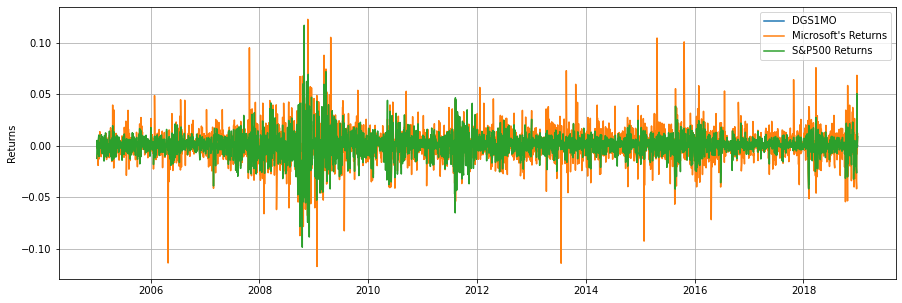

In [ ]:
plot_returns(r_return)

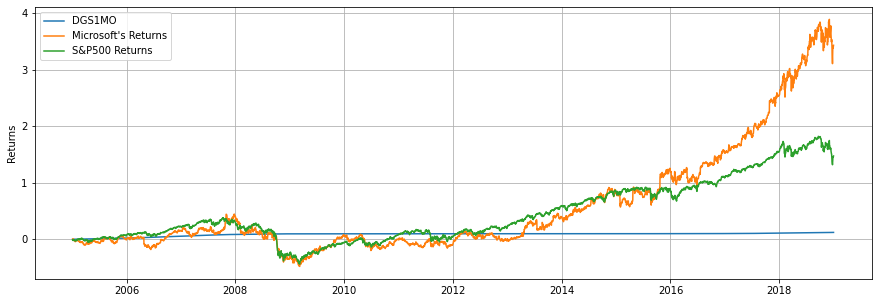

In [ ]:
plot_returns((1+r_return).cumprod()-1)

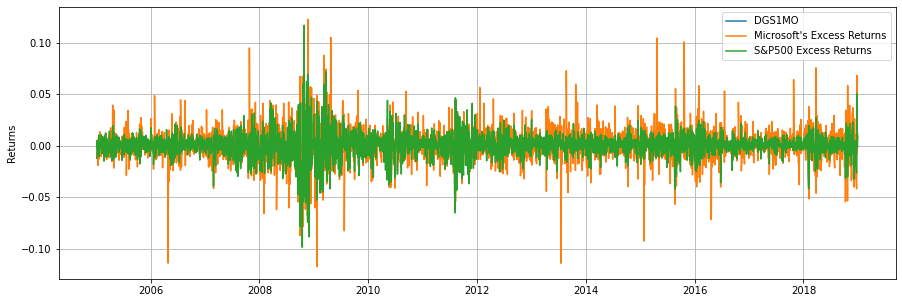

In [ ]:
plot_returns(r_excess)

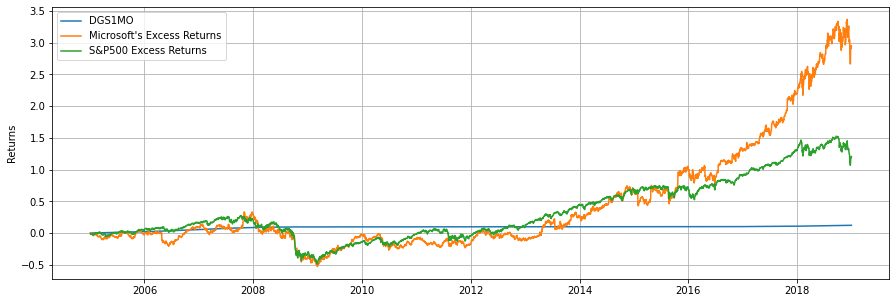

In [ ]:
plot_returns((1+r_excess).cumprod()-1)

### Plot realized excess returns

- Produce a scatter plot with realized excess returns on MSFT on the $y$-axis vs. realized excess returns on the S&P500 index on the $x$-axis.
- How well can a regression line fit the data. Do you expect to get a high $R^2$?

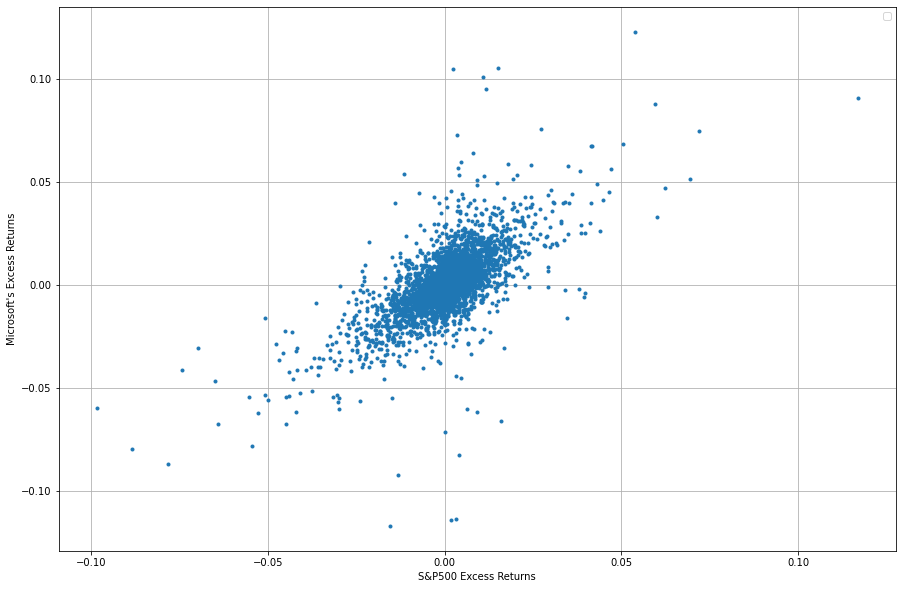

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(r_excess['S&P500 Excess Returns'], r_excess["Microsoft's Excess Returns"], '.')

plt.legend()
plt.grid(True)
plt.ylabel("Microsoft's Excess Returns");
plt.xlabel("S&P500 Excess Returns");


### Estimating the CAPM for MSFT
- Estimate the CAPM for MSFT by runnning a linear regression of MSFT excess returns onto S&P500 excess returns
- Make sure you include a constant in the regression
- Output regression coefficients and all summary statistics
- Interpret the numbers.

In [ ]:
#Importing the relevant library
import statsmodels.api as sm

exog = r_excess["S&P500 Excess Returns"]
exog = sm.add_constant(exog, prepend=True,)
mod = sm.OLS(r_excess["Microsoft's Excess Returns"], exog,)
res = mod.fit()
print(res.summary())


                                OLS Regression Results                                
Dep. Variable:     Microsoft's Excess Returns   R-squared:                       0.462
Model:                                    OLS   Adj. R-squared:                  0.462
Method:                         Least Squares   F-statistic:                     2998.
Date:                        Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                                00:37:11   Log-Likelihood:                 10514.
No. Observations:                        3496   AIC:                        -2.102e+04
Df Residuals:                            3494   BIC:                        -2.101e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


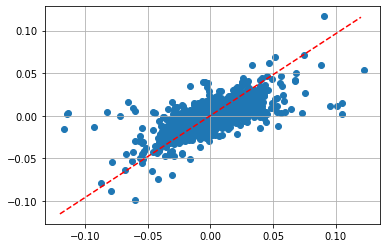

In [ ]:

ols = sm.OLS(r_excess["Microsoft's Excess Returns"], sm.add_constant(r_excess["S&P500 Excess Returns"])).fit()
plt.scatter(r_excess["Microsoft's Excess Returns"], r_excess["S&P500 Excess Returns"])
plt.grid(True)
r = np.array([-0.12, 0.12]) # range for the line
plt.plot(r, ols.params[0] + r*ols.params[1], 'r--')
plt.show()

### Testing statistical hypotheses

Please test the statistical hypotheses in the problem set ($\alpha=0$ and $\beta=1$) against their alternatives.

Hint: you can access various regression results using these fileds of the object which OLS() function returns:
- *.params* for parameter estimates
- *.tvalues* for $t$-statistics
- *.pvalues* for $p$-values
- *.bse* or *np.sqrt(np.diag(res.cov_params()))* for std err
- *.rsquared* to get a regression $R^2$

You can use $p$-values of Normal distribution. *pval = stats.norm.sf(np.abs(tstat))$*2$* returns a two-sided $p$-value for a given *tstat* (don't forget to run *import scipy.stats as stats* first). One-sided $p$-value is then *pval = stats.norm.sf(tstat)*.

Alternatively, you can compute test statistics cutoff thresholds using the stats.norm.ppf() function. For example:

In [ ]:
import scipy.stats as stats
one_sided_tstat = stats.norm.ppf(.95)
one_sided_tstat

1.6448536269514722

In [ ]:
two_sided_tstat = stats.norm.ppf(.975)
two_sided_tstat


1.959963984540054

#### One-sided $\beta$ test:
$H_0$ (null hypothesis): $\beta=1$

$H_1$ (alternative hypothesis): $\beta>1$.


#### Two-sided $\alpha$ test:
$H_0$ (null hypothesis): $\alpha=0$

$H_1$ (alternative hypothesis): $\alpha\neq 0$.


### PART II: CAPM



b) I would say a regression line is possible but it would not be a great fit for our data in this case. I do not expect to get a high R^2 in our case. I have plotted and put a regression line on our data and it proves that our regression line is not very well fit and that R^2 is not high.



  
c) In our case we have an R^2 of 0.462 which explains that 46.2% of the risk is from Microsoft and that 53.8% is the risk coming from the market. As we have a fair R^2, the dependent is not as well explained by the independent variable in our case.


Alpha:
α = 0.0002 with a very low standard of error.

t = 1.208 (low t stat means great evidence for the null hypothesis)

p value = 0.227 High P value

Percentile[0.025  0.975]: Confidence interval

[-0.000 0.0001]

Beta:

β = 0.9621 : Approximate beta value

std error = 0.018 : Standard error

t = 54.757 : T value based on simulation

p value = 0.000  : Significant p value

Percentile[0.025  0.975]:  Confidence interval

[-0.928 0.996]





d) H0  (null hypothesis): β=1

H1 (alternative hypothesis): β>1

In our case, for beta of 0.9621 we can calculate a T value of:

= (0.96-1)/0.018 = -2.105

T value of -2.105 is less than 1.65 our threshold and so we cannot reject the null hypthesis that beta = 1.


In our case, we can concldue that the null hypothesis cannot be rejected and so the analysts claims are empirically verified.





e) H0  (null hypothesis):  α=0

H1  (alternative hypothesis):  α≠0

We can use the t test to verify if we should reject the null hypothesis.

Our t value is 1.208 and out limit threshold for the null hypothesis is

-1.64 to 1.64

The t value is in between these values and so we cannot reject the null hypothesis.

Also, we can verify with the confidence interval:

Percentile[0.025  0.975]:

[-0.000 0.0001]

It is evident that 0 is inbetween these values and so again we cannot reject the null hypothesis.

The returns in this investement are not favorable to an investor looking to get good returns. The null hypothesis cannot be rejected and so we have an alpha of 0 which is basically the same as an index and so investing in this asset is not favorable.





